# Personal Loan analysis

**Importing required libraries and reading the dataset**

In [307]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [308]:
loan_df = pd.read_excel("/Users/edward/My Drive/Github/Personal Loan Analysis/data/Bank_Personal_Loan_Modelling.xlsx",1)


**Explore the Given Data**

In [309]:
loan_df.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [310]:
loan_df.shape

(5000, 14)

In [311]:
loan_df.skew()

ID                     0.000000
Age                   -0.029341
Experience            -0.026325
Income                 0.841339
ZIP Code             -12.500221
Family                 0.155221
CCAvg                  1.598457
Education              0.227093
Mortgage               2.104002
Personal Loan          2.743607
Securities Account     2.588268
CD Account             3.691714
Online                -0.394785
CreditCard             0.904589
dtype: float64


**Looking for missing values in the dataset**

In [312]:
loan_df.isnull().sum()

ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

In [313]:
loan_df.columns

Index(['ID', 'Age', 'Experience', 'Income', 'ZIP Code', 'Family', 'CCAvg',
       'Education', 'Mortgage', 'Personal Loan', 'Securities Account',
       'CD Account', 'Online', 'CreditCard'],
      dtype='object')


**Delete irrelevant columns such as "ID" or "zip code" and return a copy**

In [314]:
loan_df.drop(['ID','ZIP Code'], axis = 'columns', inplace = True)
loan_df.head()

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,1,49,4,1.6,1,0,0,1,0,0,0
1,45,19,34,3,1.5,1,0,0,1,0,0,0
2,39,15,11,1,1.0,1,0,0,0,0,0,0
3,35,9,100,1,2.7,2,0,0,0,0,0,0
4,35,8,45,4,1.0,2,0,0,0,0,0,1



Let's visually explore the data correlation using a heat map

<AxesSubplot:>

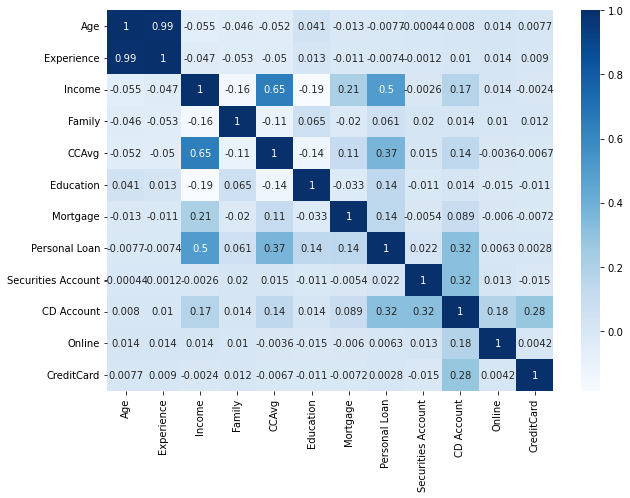

In [315]:
plt.figure(figsize=(10,7))
sns.heatmap(loan_df.corr(), annot= True, cmap='Blues')

Check for anomaly outliers in columns with a higher correlation from above

In [316]:
fig=px.box(loan_df,y=['Age', 'Experience', 'Income', 'Family', 'Education'])
fig.show()

**Visually we can see that "Income" has a lot of outliers. Furthermore, "Experience" has values below zero which should not appear. We need to eliminate them later.**

In [317]:
loan_df[['Experience']].mean()

Experience    20.1046
dtype: float64

In [318]:
negative_exp=loan_df[loan_df['Experience']<0]
negative_exp.head()

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
89,25,-1,113,4,2.30,3,0,0,0,0,0,1
226,24,-1,39,2,1.70,2,0,0,0,0,0,0
315,24,-2,51,3,0.30,3,0,0,0,0,1,0
451,28,-2,48,2,1.75,3,89,0,0,0,1,0
524,24,-1,75,4,0.20,1,0,0,0,0,1,0


In [319]:
negative_exp.size

624

In [320]:
new_loan=loan_df.copy()
new_loan.head()

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,1,49,4,1.6,1,0,0,1,0,0,0
1,45,19,34,3,1.5,1,0,0,1,0,0,0
2,39,15,11,1,1.0,1,0,0,0,0,0,0
3,35,9,100,1,2.7,2,0,0,0,0,0,0
4,35,8,45,4,1.0,2,0,0,0,0,0,1


In [321]:
#Lets change the experience and confirm that it worked
new_loan['Experience']=np.where(new_loan['Experience']<0,new_loan['Experience'].mean(),new_loan['Experience'])
new_loan[new_loan['Experience']<0]

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard


**What is the eduaction level in the dataset?**

In [322]:
new_loan.head()

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,1.0,49,4,1.6,1,0,0,1,0,0,0
1,45,19.0,34,3,1.5,1,0,0,1,0,0,0
2,39,15.0,11,1,1.0,1,0,0,0,0,0,0
3,35,9.0,100,1,2.7,2,0,0,0,0,0,0
4,35,8.0,45,4,1.0,2,0,0,0,0,0,1


In [323]:
new_loan['Education'].unique()

array([1, 2, 3])

In [324]:
def Edu_level(x):
    if x==1:
        return 'Undergraduate'
    elif x==2:
        return 'Graduate/Professional'
    else:
        return 'Post-graduate'

In [325]:
new_loan['Education_level']=new_loan['Education'].apply(Edu_level)

In [326]:
new_loan.head()

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard,Education_level
0,25,1.0,49,4,1.6,1,0,0,1,0,0,0,Undergraduate
1,45,19.0,34,3,1.5,1,0,0,1,0,0,0,Undergraduate
2,39,15.0,11,1,1.0,1,0,0,0,0,0,0,Undergraduate
3,35,9.0,100,1,2.7,2,0,0,0,0,0,0,Graduate/Professional
4,35,8.0,45,4,1.0,2,0,0,0,0,0,1,Graduate/Professional


In [ ]:
new_loan.hist(figsize=(25,25))

array([[<AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'Experience'}>,
        <AxesSubplot:title={'center':'Income'}>],
       [<AxesSubplot:title={'center':'Family'}>,
        <AxesSubplot:title={'center':'CCAvg'}>,
        <AxesSubplot:title={'center':'Education'}>],
       [<AxesSubplot:title={'center':'Mortgage'}>,
        <AxesSubplot:title={'center':'Personal Loan'}>,
        <AxesSubplot:title={'center':'Securities Account'}>],
       [<AxesSubplot:title={'center':'CD Account'}>,
        <AxesSubplot:title={'center':'Online'}>,
        <AxesSubplot:title={'center':'CreditCard'}>]], dtype=object)

In [ ]:
Edu_level=new_loan.groupby('Education_level')['Age'].count()
Edu_level

In [ ]:
fig=px.pie(new_loan,values=Edu_level, names=Edu_level.index, title='Education Level',
           color_discrete_sequence=px.colors.sequential.haline)
fig.show()

How the education level is related with personal loan?

In [ ]:
px.box(new_loan,x='Education',y='Income',facet_col='Personal Loan')

**We can see that people who receive a loan regardless of their education level have a higher average income. People with a lower income are less likely to receive a loan.**

However, there is still a lot of people with an "undergraduate" degree who has a relatively high income who does not receive any income. Let's see if other attributes can explain this.

Firstly, let's see if the kind of investment matters for a person to receive a loan.

In [ ]:
def Security_or_CD(row):
    if (row['Securities Account']==1) & (row['CD Account']==1):
        return 'Invests in Securities and Deposit'
    elif (row['Securities Account']==0) & (row['CD Account']==0):
        return 'Does not Invest in Securities nor Deposit'
    elif (row['Securities Account']==1) & (row['CD Account']==0):
        return 'Invests in only Securities'
    elif (row['Securities Account']==0) & (row['CD Account']==1):
        return 'Invests in only Deposit'

In [ ]:
new_loan['account_type']=new_loan.apply(Security_or_CD,axis=1)
new_loan.head()

In [ ]:
Holder_type=new_loan['account_type'].value_counts()
Holder_type

In [ ]:
fig=px.pie(new_loan,values=Holder_type, names=Holder_type.index, title='Investment Type',color_discrete_sequence=px.colors.sequential.Agsunset)
fig.show()

**We can see the majority of the customers do not invest in either securities or bank deposits. Therefore we cannot tell from this attribute whether holding a diverse investment account helps with obtaining an personal loan.**

**Let's Compare the rest of the attributes**

In [ ]:
#Define a function which separates individuals by their loan status and compare the attributes
def plot_loan(col1,label1,label2,title):
    plt.figure(figsize=(12,8))
    sns.kdeplot(new_loan[new_loan['Personal Loan']==0][col1],label=label1, color='Red')
    sns.kdeplot(new_loan[new_loan['Personal Loan']==1][col1],label=label2, color= 'Darkblue')
    plt.legend()
    plt.title(title)

In [ ]:
plot_loan('Income','Without a personal loan','With a personal loan','Income Distribution')

In [ ]:
plot_loan('CCAvg','Without a personal loan','With a personal loan','Credit Card Distribution')

In [ ]:
plot_loan('Mortgage','Without a personal loan','With a personal loan','Mortgage Distribution')

In [ ]:
plot_loan('Family','Without a personal loan','With a personal loan','Family members Distribution')

In [ ]:
data_columns = ['Securities Account', 'Online', 'CreditCard', 'account_type']

In [ ]:
for i in data_columns:
    plt.figure(figsize= (15,5))
    sns.countplot(x=i, hue = 'Personal Loan', data= new_loan, palette='PuBu' )